```
Jenny Zeng  
52082740  
zhaohuaz@uci.edu  
```

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
import seaborn as sns
from bokeh.io import output_notebook
from bokeh.plotting import gridplot, figure
from bokeh.charts import show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
output_notebook()

Loading BokehJS ...

# Problem 1: Linear Regression
## (a) Load the “data/curve80.txt” data set, and split it into 75% / 25% training/test. The
first column data[:,0] is the scalar feature (x) values; the second column data[:,1] is the
target value y for each example. For consistency in our results, don’t reorder (shuffle) the
data (they’re already in a random order), and use the first 75% of the data for training and
the rest for testing:

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
import mltools as ml
# np.random.seed(0)

# load the text file
data = np.genfromtxt("data/curve80.txt",delimiter=None) 
X = data[:,0]
# code expects shape (M,N) so make sure it's 2-dimensional
X = X[:,np.newaxis] 
Y = data[:,1] # doesn't matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

## (b) Use the provided linearRegress class to create a linear regression predictor of y given x.
You can plot the resulting function by simply evaluating the model at a large number of x
values, xs:

In [4]:
lr = ml.linear.linearRegress( Xtr, Ytr ); # create and train model
xs = np.linspace(0,10,200); # densely sample possible x-values
# force "xs" to be an Mx1 matrix (expected by our code)
xs = xs[:,np.newaxis] 
ys = lr.predict( xs ); # make predictions at xs

Plot the training data along with your prediction function in a single plot. Print the linear
regression coefficients (lr.theta) and check that they match your plot. Finally, calculate
and report the mean squared error in your predictions on both the training and test data.

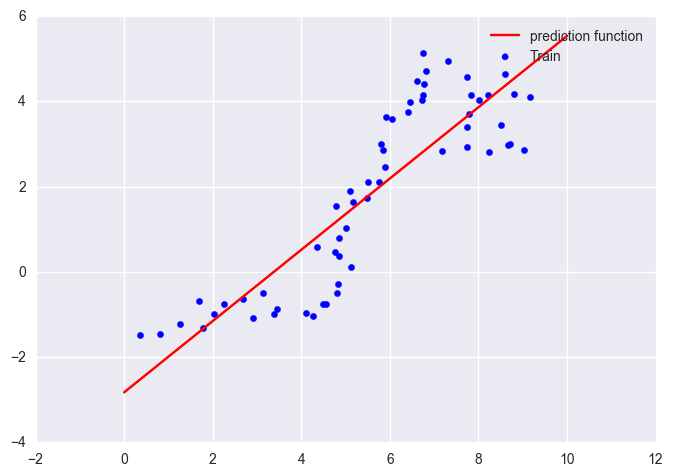

In [11]:
# Plot the training data along with your prediction function
# in a single plot. 
plt.scatter(Xtr[:, 0],Ytr, color='blue', label='Train')
plt.plot(xs[:,0], ys, color='red', label = 'prediction function')
correct_axis = plt.axis()
plt.legend()
plt.show()


In [6]:
# Print the linear regression coefficients (lr.theta)
print("linear regression coefficients: ", lr.theta) 
print("we can get two points randomly from xs")
point1 = (xs[1,0], ys[1,0])
point2 = (xs[100,0], ys[100,0])
print("point1: ", point1)
print("point2: ", point2)
print("theta1: (y1-y2)/(x1-x2) = %f = %f"%(
        (point1[1]-point2[1])/(point1[0]-point2[0]) , lr.theta[0,1]))
point3 = (xs[0,0], ys[0,0])
print("theta0: when x3 = 0, we have point3: ", point3)
print("because y3 = theta0, we can prove that theta0 is correct.\n \
      Consequently, we get the correct theta.")


linear regression coefficients:  [[-2.82765049  0.83606916]]
we can get two points randomly from xs
point1:  (0.050251256281407038, -2.7856369620235077)
point2:  (5.025125628140704, 1.3737020764656096)
theta1: (y1-y2)/(x1-x2) = 0.836069 = 0.836069
theta0: when x3 = 0, we have point3:  (0.0, -2.8276504876648119)
because y3 = theta0, we can prove that theta0 is correct.
       Consequently, we get the correct theta.


In [7]:
# calculate and report the mean squared error
# in your predictions on both the training and test data.
# Ytr_predict = lr.predict(Xtr)[:,0]
mean_squared_error_tr = lr.mse(Xtr, Ytr)
print("mean squared error in my predictions on training data: ", 
      mean_squared_error_tr)

# Yte_predict = lr.predict(Xte)[:,0]
mean_squared_error_te = lr.mse(Xte, Yte)
print("mean squared error in my predictions on test data: ", 
      mean_squared_error_te)

mean squared error in my predictions on training data:  1.12771195561
mean squared error in my predictions on test data:  2.24234920301


### (c) Try fitting y = f(x) using a polynomial function f(x) of increasing order.

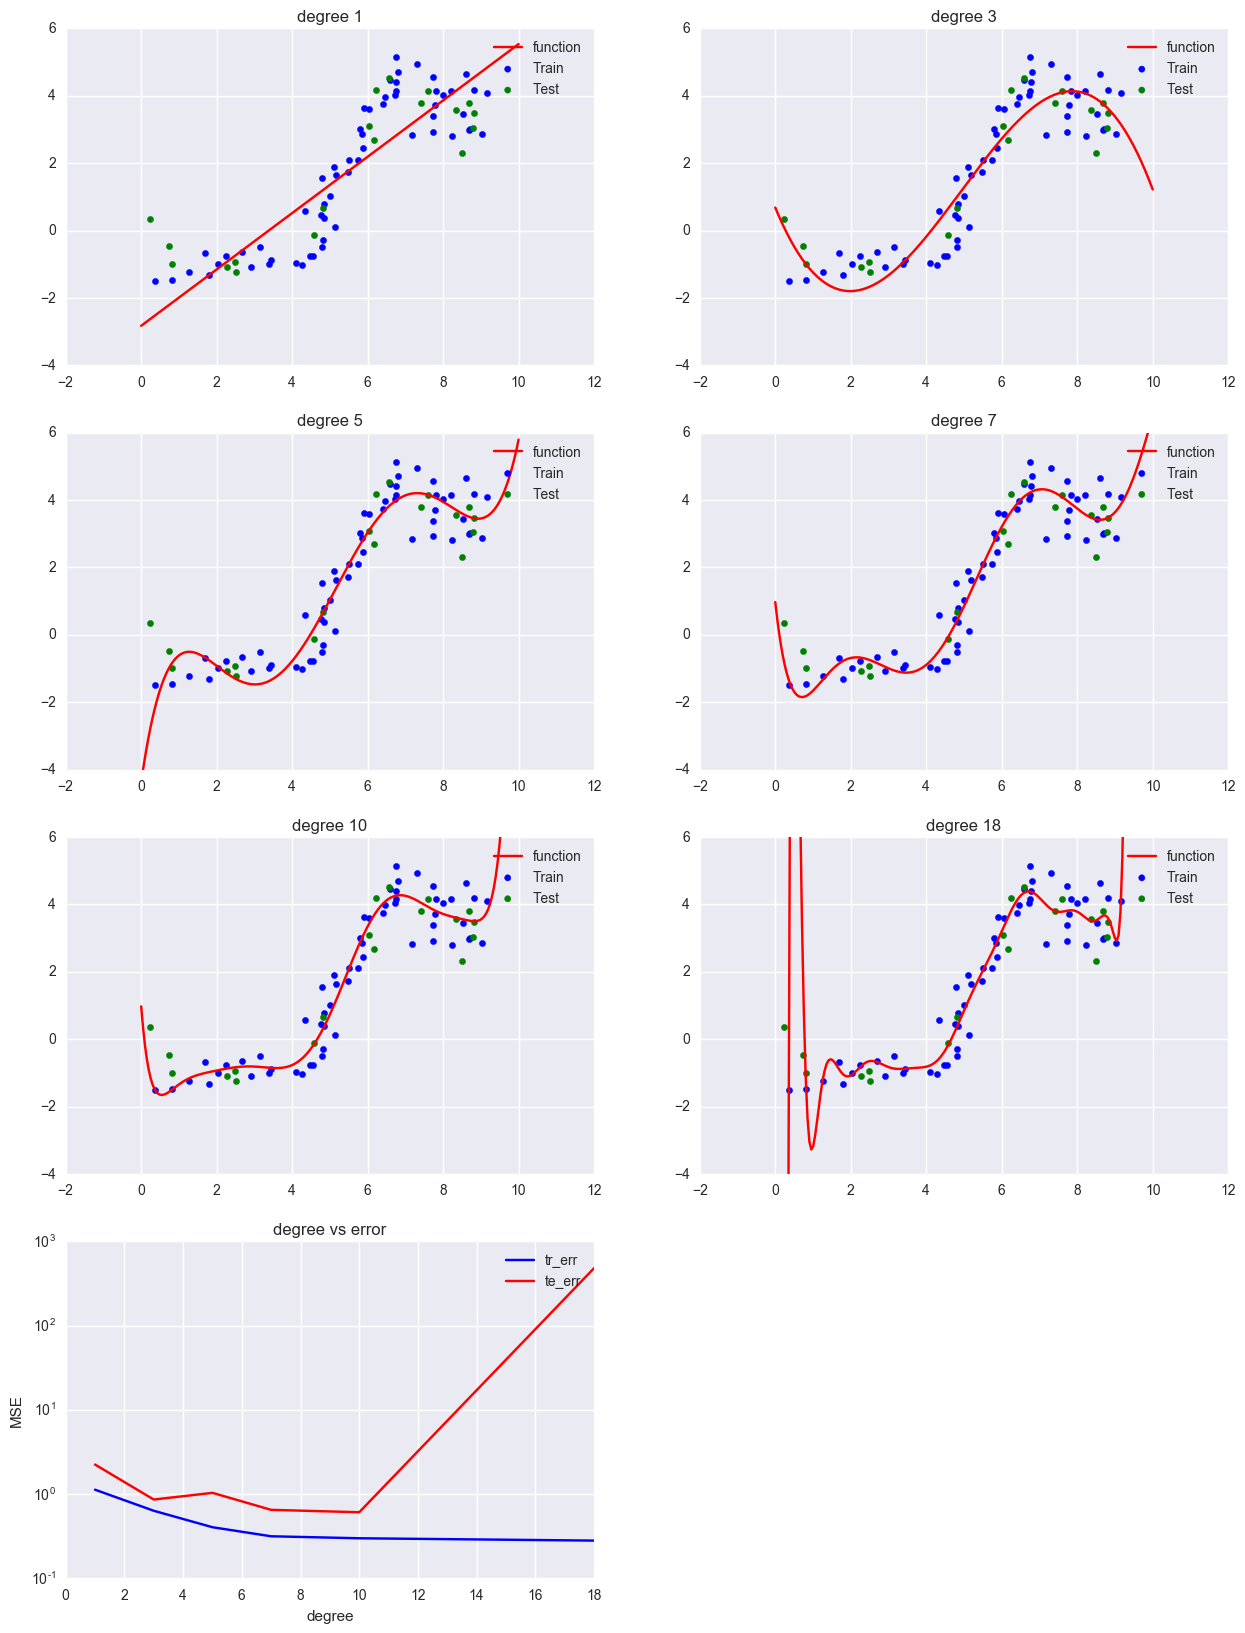

In [13]:
# degree
degrees = [1, 3, 5, 7, 10, 18]
tr_err, te_err = [],[]

# for plotting figure
fig = plt.figure(figsize=(15,20))
fignum = 421

# plot their learned prediction function f(x)
# and (2) their training and test errors
for degree in degrees:
    # Create polynomial features up to "degree"; 
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False);
    # Rescale the data matrix 
    XtrP,params = ml.transforms.rescale(XtrP);
    lr = ml.linear.linearRegress( XtrP, Ytr ); # create and train model
    XteP,_ = ml.transforms.rescale( 
        ml.transforms.fpoly(Xte,degree,False), params);
    
    xsp,_ = ml.transforms.rescale(
        ml.transforms.fpoly(xs,degree,False), params);
    ysp = lr.predict(xsp); # make predictions at xs

    
    # (1) plot their learned prediction function f(x)
    ax = fig.add_subplot(fignum)
    fignum+=1
    plt.title("degree %d"%(degree))
    plt.scatter(Xtr, Ytr, color='blue', label='Train')
    plt.scatter(Xte, Yte, color='green', label='Test')
    plt.plot(xs, ysp, color = "red", label = "function")
    plt.legend()
    plt.axis(correct_axis)
    # (2) their training and test errors
    tr_err.append(lr.mse(XtrP, Ytr))
    te_err.append(lr.mse(XteP, Yte))
    
ax = fig.add_subplot(fignum)  
plt.title("degree vs error")
plt.semilogy(degrees, tr_err, color="blue", label="tr_err")
plt.semilogy(degrees, te_err, color = "red", label="te_err")
plt.ylabel("MSE")
plt.xlabel("degree")
plt.legend()

plt.show()


Based on the figures above, degree = 10 would be the best fit because we get the lowest MSE of the test data.

# Problem 2: Cross-validation

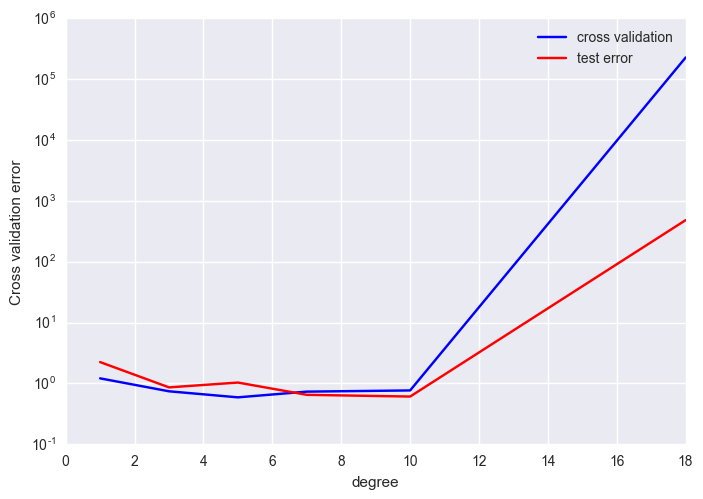

In [14]:
nFolds = 5
J = J = [[None]*nFolds for _ in range(len(degrees))]
for degree in range(len(degrees)):
    for iFold in range(nFolds):
        # take ith data block as validation
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold); 
        # rescale data for different degrees
        XtiP = ml.transforms.fpoly(Xti, degrees[degree], bias=False);
        XtiP,params = ml.transforms.rescale(XtiP);
        XviP,_ = ml.transforms.rescale( 
            ml.transforms.fpoly(Xvi,degrees[degree],False), params);
        # train on Xti, Yti , the data for this fold
        lr = ml.linear.linearRegress(XtiP, Yti) 
         # now compute the MSE on Xvi, Yvi and save it
        J[degree][iFold] = lr.mse(XviP, Yvi)#sum((Yvi - lr.predict(XviP)[:,0])**2)
    # the overall estimated validation performance is 
    # the average of the performance on each fold
    J[degree] = np.mean(J[degree])

# Plot the cross-validation error
# (with semilogy, as before) as a function of degree.
plt.semilogy(degrees, J, color="blue", label = "cross validation")
plt.semilogy(degrees, te_err, color = "red", label = "test error")
plt.legend()
plt.ylabel("Cross validation error")
plt.xlabel("degree")
plt.show()

Degree 5 has the minimum cross-validation error while at degree 10 we has the minimum test data error.   
Comparing to use the test data to evaluate the MSE, corss validation lets us use more validation data. However, we have to train k (number of folds) models for each degree rather than 1. Moreover, it does not evaluate any particular predictor because it evaluates k different models and get the average. The data size for evaluating each time is also smaller. 